In [1]:
import warnings
import sys
import os

warnings.filterwarnings('ignore')
os.environ["CUDA_VISIBLE_DEVICES"] = ''
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
os.environ['JAX_PLATFORMS'] = 'cpu'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

import jax.numpy as jnp
import pandas as pd
import numpy as np
from utils import parse_run, read_meta_data, df_threshold_residuals
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [2]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
dir_ = 'f64_scipy_23.09'
df = pd.read_csv(os.path.join(path, dir_, 'meta_data.csv'), index_col=0)

if 'test_loss_lastalpha' in df.columns:
    print('Corrupted df')
    keys = ['test_loss_lastalpha', 'time_data', 'time_train', 'iters_mean_1e_3',
            'iters_mean_1e_6', 'iters_mean_1e_9', 'iters_mean_1e_12',
            'iters_std_1e_3', 'iters_std_1e_6', 'iters_std_1e_9', 'iters_std_1e_12',
            'time_mean_1e_3', 'time_mean_1e_6', 'time_mean_1e_9', 'time_mean_1e_12',
            'time_std_1e_3', 'time_std_1e_6', 'time_std_1e_9', 'time_std_1e_12']
    values = ['test_loss_last', 'alpha'] + keys[1:-1]
    d_ = {k:v for k, v in zip(keys, values)}
    df.rename(columns=d_, inplace=True)

In [3]:
df.columns

Index(['pde', 'grid', 'variance', 'N_samples_train', 'N_samples_test',
       'lhs_type', 'batch_size', 'epoch_num', 'lr_start', 'schedule_params',
       'precision', 'prec_inverse', 'loss_type', 'cg_valid_repeats',
       'train_loss_last', 'test_loss_last', 'alpha', 'time_data', 'time_train',
       'iters_mean_1e_3', 'iters_mean_1e_6', 'iters_mean_1e_9',
       'iters_mean_1e_12', 'iters_std_1e_3', 'iters_std_1e_6',
       'iters_std_1e_9', 'iters_std_1e_12', 'time_mean_1e_3', 'time_mean_1e_6',
       'time_mean_1e_9', 'time_mean_1e_12', 'time_std_1e_3', 'time_std_1e_6',
       'time_std_1e_9', 'time_std_1e_12'],
      dtype='object')

In [14]:
df.query('pde == "div_k_grad" and grid == 64 and variance == 0.5 and lhs_type == "l_ilu0"').loc[:, ['batch_size', 'N_samples_train', 'lr_start', 'epoch_num', 'time_train']]

,batch_size,N_samples_train,lr_start,epoch_num,time_train
2z6ffy,8.0,1000.0,0.001,1000.0,4989.309744


In [15]:
np.round(20460.269431) / 2 / 60 

170.5

,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,precision,prec_inverse,loss_type,cg_valid_repeats,train_loss_last,test_loss_last,alpha,time_data,time_train,iters_mean_1e_3,iters_mean_1e_6,iters_mean_1e_9,iters_mean_1e_12,iters_std_1e_3,iters_std_1e_6,iters_std_1e_9,iters_std_1e_12,time_mean_1e_3,time_mean_1e_6,time_mean_1e_9,time_mean_1e_12,time_std_1e_3,time_std_1e_6,time_std_1e_9,time_std_1e_12
2z6ffy,div_k_grad,64.0,0.5,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,f64,False,llt,350.0,396.990124,398.647696,-0.063597,20.064197,4989.309744,38.155,49.62,60.48,71.01,1.144978,1.305986,1.381883,1.565216,0.096037,0.121728,0.146091,0.169674,0.094933,0.095821,0.096643,0.097531


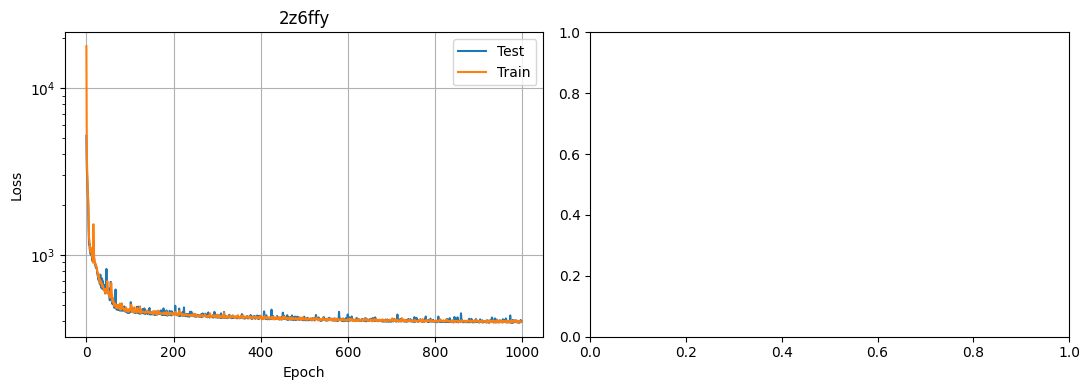

In [19]:
parse_run(dir_, ['2z6ffy'], (11, 4), with_cond=False) # Second argument may be a list of idnex or 'check'

In [6]:
print(df.query('lhs_type == "l_ilu0" and pde == "poisson"').loc[:,['pde', 'grid', 'epoch_num', 'variance', 'alpha', 'iters_mean_1e_3', 'iters_mean_1e_6', 'iters_mean_1e_9', 'iters_mean_1e_12']].apply(lambda x: np.round(x[4], 3), axis=1))
df.query('lhs_type == "l_ilu0" and pde == "poisson"').loc[:,['pde', 'grid', 'epoch_num', 'variance', 'alpha', 'iters_mean_1e_3', 'iters_mean_1e_6', 'iters_mean_1e_9', 'iters_mean_1e_12']]

zmaylf   -0.164
f8arua   -0.159
aic3pi   -0.188
ww76b1   -0.202
dtype: float64


,pde,grid,epoch_num,variance,alpha,iters_mean_1e_3,iters_mean_1e_6,iters_mean_1e_9,iters_mean_1e_12
zmaylf,poisson,32.0,1000.0,0.1,-0.163900,19.985,27.105,34.025,40.305
f8arua,poisson,32.0,1000.0,0.1,-0.159131,20.005,27.140,34.040,40.350
aic3pi,poisson,64.0,1000.0,0.1,-0.187506,31.005,40.925,49.980,58.785
ww76b1,poisson,128.0,1000.0,0.1,-0.202498,47.545,61.025,73.270,85.835


In [29]:
import numpy as np
np.array([0.0502, 0.059898, 0.069303]) + 8.6*1e-2

array([0.1362  , 0.145898, 0.155303])

In [142]:
pde = 'poisson'
grid = 128
var = .1
lhs = 'fd'

q = f"pde == '{pde}' and grid == {grid} and variance == {var} and lhs_type == '{lhs}' and epoch_num > 500"
df_crop = df.query(q)
df_crop

,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,precision,prec_inverse,loss_type,cg_valid_repeats,train_loss_last,test_loss_last,alpha,time_data,time_train,iters_mean_1e_3,iters_mean_1e_6,iters_mean_1e_9,iters_mean_1e_12,iters_std_1e_3,iters_std_1e_6,iters_std_1e_9,iters_std_1e_12,time_mean_1e_3,time_mean_1e_6,time_mean_1e_9,time_mean_1e_12,time_std_1e_3,time_std_1e_6,time_std_1e_9,time_std_1e_12
5j1d0o,poisson,128,0.1,1000,200,fd,8,2000,0.001,None,f64,False,llt,300,4970.67368,4939.235889,-42,5.136115,40828.986974,50.0,63.0,76.0,89.0,0.0,0.0,0.0,0.0,0.427795,0.534954,0.642025,0.749113,0.077958,0.079323,0.080637,0.081999


In [143]:
print(q + '\n')
print(f'1e-3\n iters: {df_crop.iters_mean_1e_3[0]:.0f}±{df_crop.iters_std_1e_3[0]:.2f}\n time: {df_crop.time_mean_1e_3[0]:.4f}±{df_crop.time_std_1e_3[0]:.5f}\n')
print(f'1e-6\n iters: {df_crop.iters_mean_1e_6[0]:.0f}±{df_crop.iters_std_1e_6[0]:.2f}\n time: {df_crop.time_mean_1e_6[0]:.4f}±{df_crop.time_std_1e_6[0]:.5f}\n')
print(f'1e-9\n iters: {df_crop.iters_mean_1e_9[0]:.0f}±{df_crop.iters_std_1e_9[0]:.2f}\n time: {df_crop.time_mean_1e_9[0]:.4f}±{df_crop.time_std_1e_9[0]:.5f}\n')

pde == 'poisson' and grid == 128 and variance == 0.1 and lhs_type == 'fd' and epoch_num > 500

1e-3
 iters: 50±0.00
 time: 0.4278±0.07796

1e-6
 iters: 63±0.00
 time: 0.5350±0.07932

1e-9
 iters: 76±0.00
 time: 0.6420±0.08064



,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,precision,prec_inverse,loss_type,cg_valid_repeats,train_loss_last,test_loss_last,alpha,time_data,time_train,iters_mean_1e_3,iters_mean_1e_6,iters_mean_1e_9,iters_mean_1e_12,iters_std_1e_3,iters_std_1e_6,iters_std_1e_9,iters_std_1e_12,time_mean_1e_3,time_mean_1e_6,time_mean_1e_9,time_mean_1e_12,time_std_1e_3,time_std_1e_6,time_std_1e_9,time_std_1e_12
zlirul,div_k_grad,128.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,f64,False,llt,350.0,1746.969604,1722.464358,-0.062498,22.185723,20460.269431,66.765,84.78,101.645,117.77,3.210884,3.464333,3.868976,4.224583,0.568681,0.717592,0.856984,0.990283,0.078423,0.078653,0.078647,0.07944


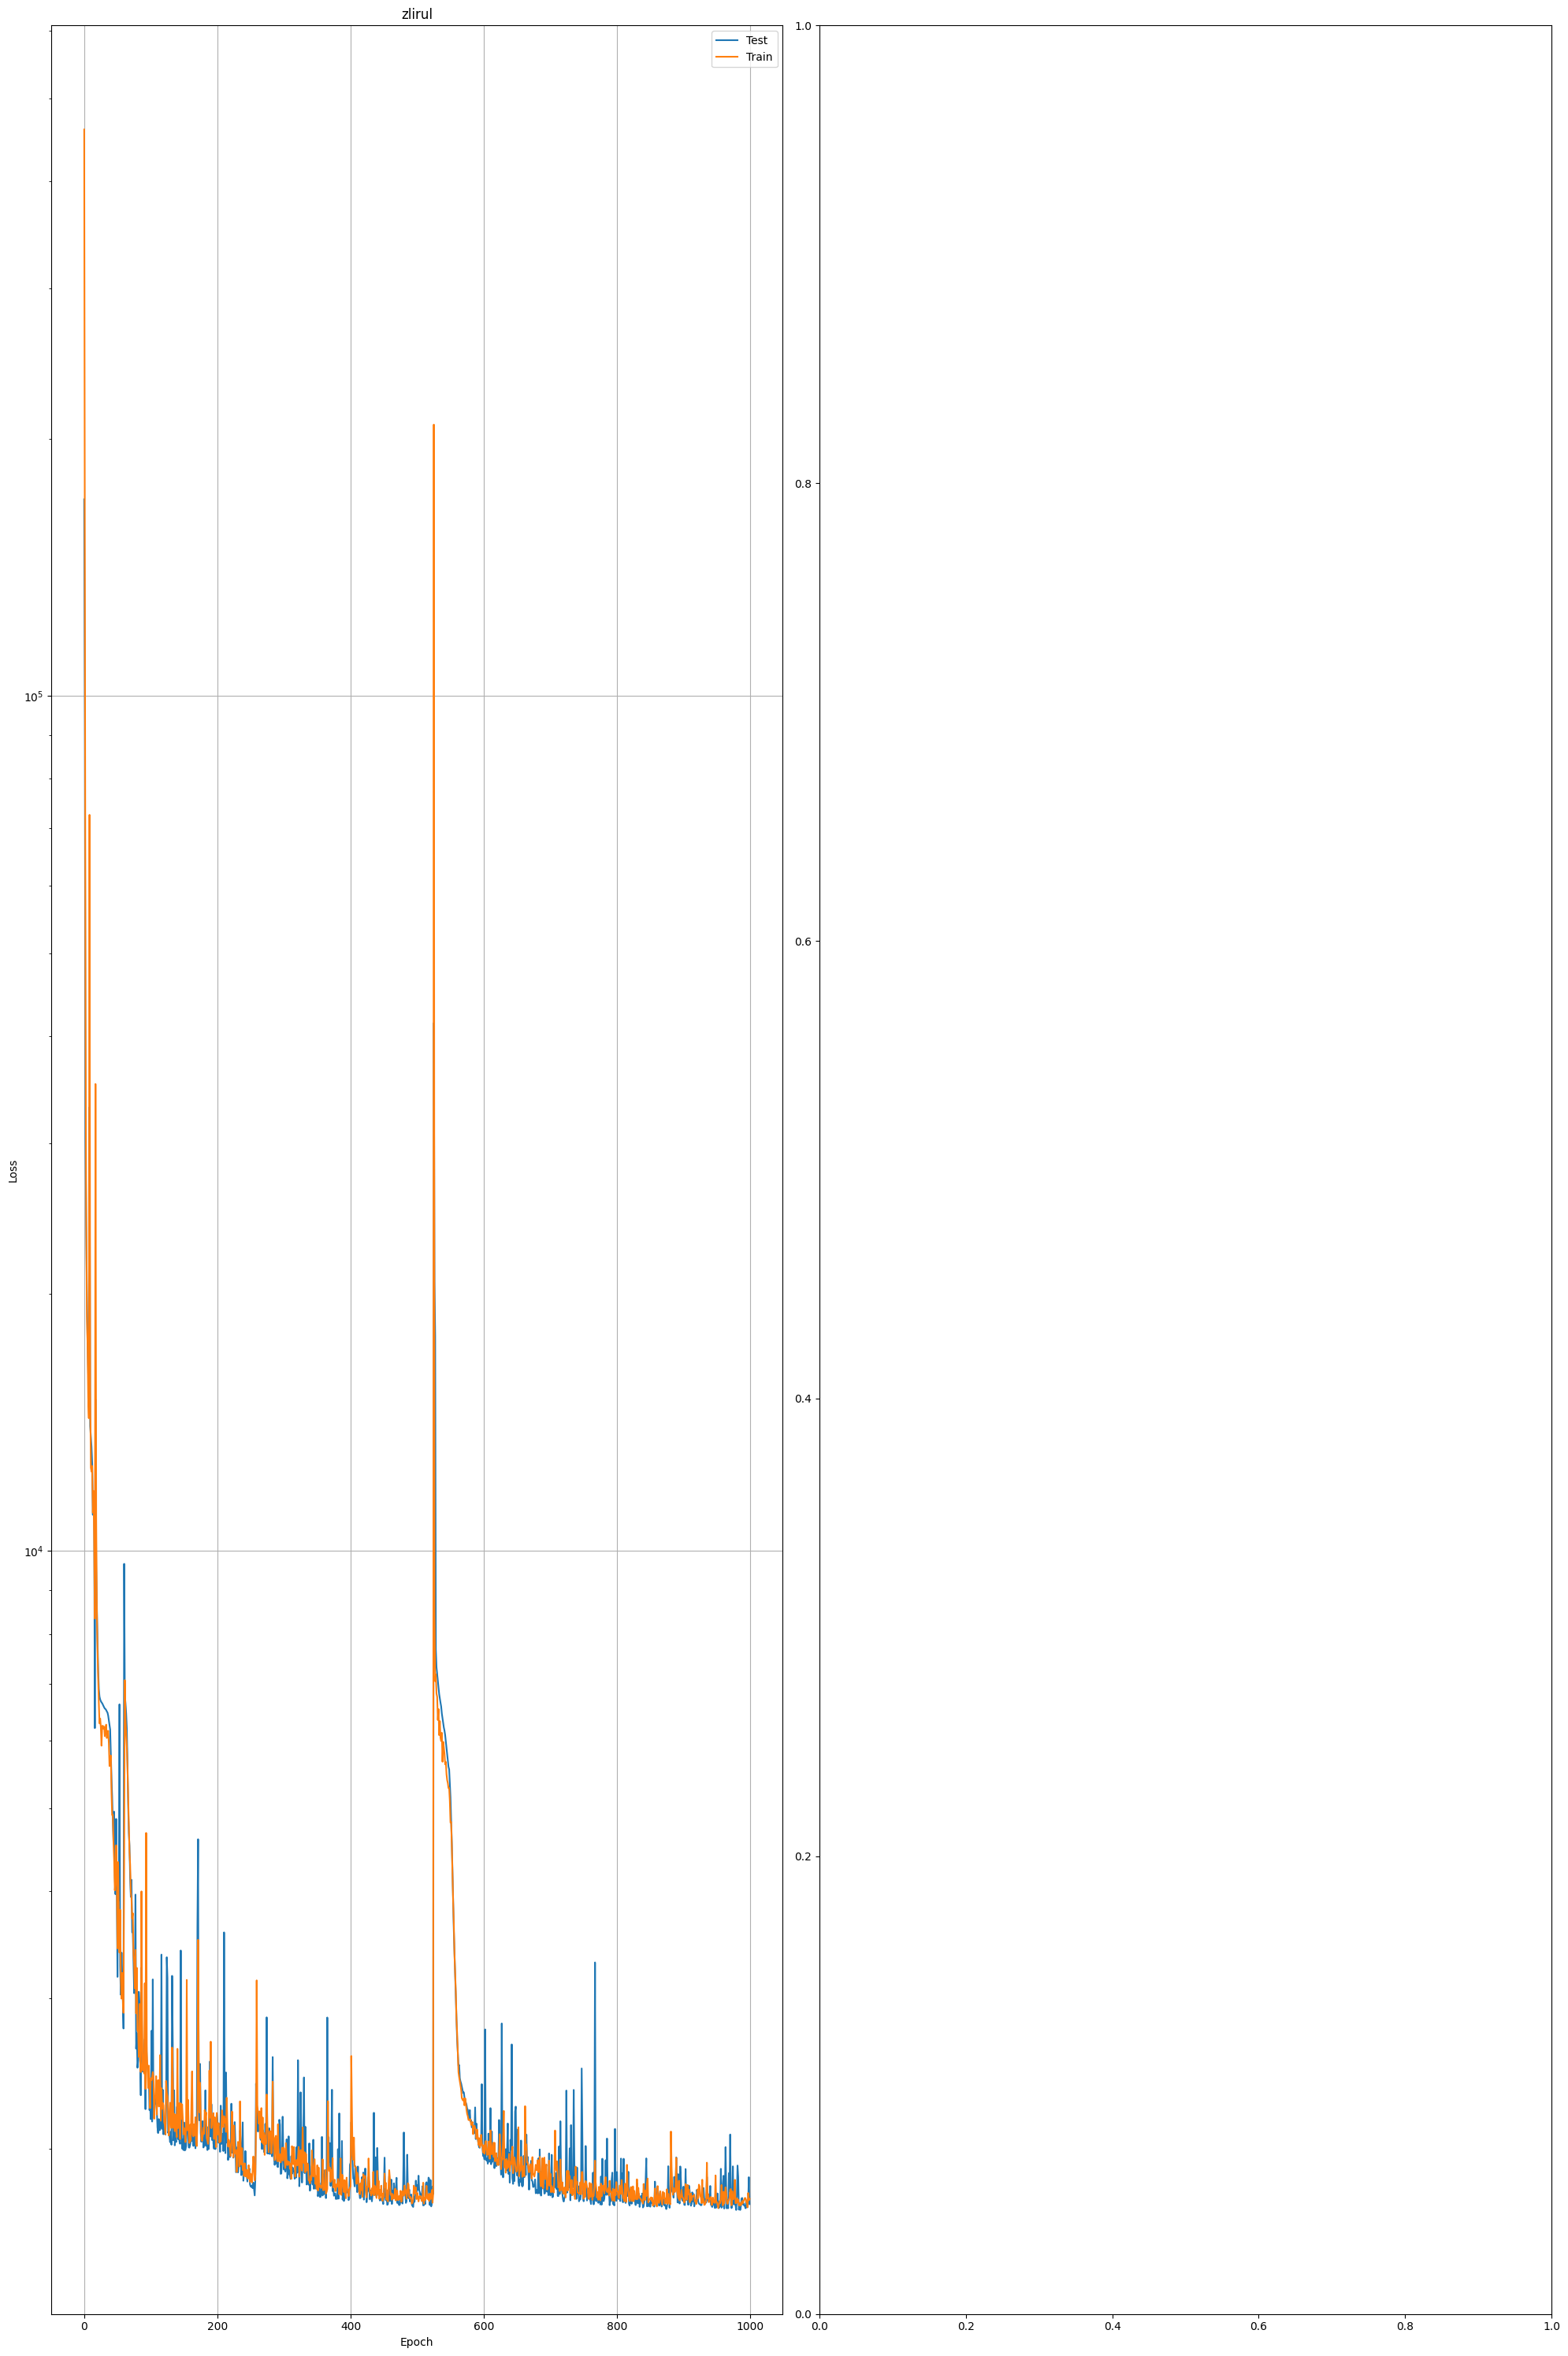

In [19]:
parse_run(dir_, df.query('pde == "div_k_grad" and variance == 0.7 and grid == 128 and lhs_type == "l_ilu0"').index, (20, 30), with_cond=False) # Second argument may be a list of idnex or 'check'

In [117]:
df.loc[:, ['grid', 'variance', 'time_train', 'iters_mean_1e_3', 'iters_mean_1e_9', 'time_mean_1e_3', 'time_mean_1e_9']]

,grid,variance,time_train,iters_mean_1e_3,iters_mean_1e_9,time_mean_1e_3,time_mean_1e_9
9ruga5,32.0,0.5,1292.979932,23.920,39.355,0.039891,0.059898
99s9u9,32.0,0.7,1289.533886,25.205,41.505,0.042243,0.063792
2z6ffy,64.0,0.5,4989.309744,38.155,60.480,0.096037,0.146091
cdf5lv,64.0,0.7,4977.969517,42.495,67.490,0.110281,0.167850
gtlm8q,128.0,0.5,20513.785619,61.525,93.730,0.496078,0.746045
zlirul,128.0,0.7,20460.269431,66.765,101.645,0.568681,0.856984
decgob,32.0,0.5,105.670861,16.895,28.040,0.029530,0.044101
e50pia,32.0,0.5,1820.626829,16.225,27.010,0.029212,0.043618
thmb8b,32.0,0.7,1814.452361,17.475,28.760,0.033898,0.050246
7jpfz2,64.0,0.5,7219.615804,26.650,42.620,0.082474,0.125997


In [2]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
dir_name32_64 = 'div_k_grad_full_dataset'
div_k_grad32_64 = pd.read_csv(os.path.join(path, dir_name32_64, 'meta_data.csv'), index_col=0)

dir_name128 = 'div_k_grad05_128_full_dataset'
div_k_grad128 = pd.read_csv(os.path.join(path, dir_name128, 'meta_data.csv'), index_col=0)

run_name_32 = 'mn70w2'
run_name_64 = 'xjfmrp'
run_name_128 = 'yfbetl'

run_32 = jnp.load(os.path.join(path, dir_name32_64, run_name_32+'.npz'))
run_64 = jnp.load(os.path.join(path, dir_name32_64, run_name_64+'.npz'))
run_128 = jnp.load(os.path.join(path, dir_name128, run_name_128+'.npz'))

In [12]:
parsed_params = ['pde', 'grid', 'variance', 'N_samples_train', 'N_samples_test',
       'lhs_type', 'batch_size', 'epoch_num', 'lr_start', 'schedule_params', 'cg_valid_repeats']

div_k_grad128.loc['d6fa63', parsed_params]

pde                 div_k_grad
grid                       128
variance                   0.5
N_samples_train           1000
N_samples_test             200
lhs_type                l_ilu0
batch_size                   8
epoch_num                  700
lr_start                 0.001
schedule_params           None
cg_valid_repeats           250
Name: d6fa63, dtype: object

In [14]:
div_k_grad128.loc['d6fa63', parsed_params]['pde']

'div_k_grad'

<Figure size 1300x800 with 0 Axes>

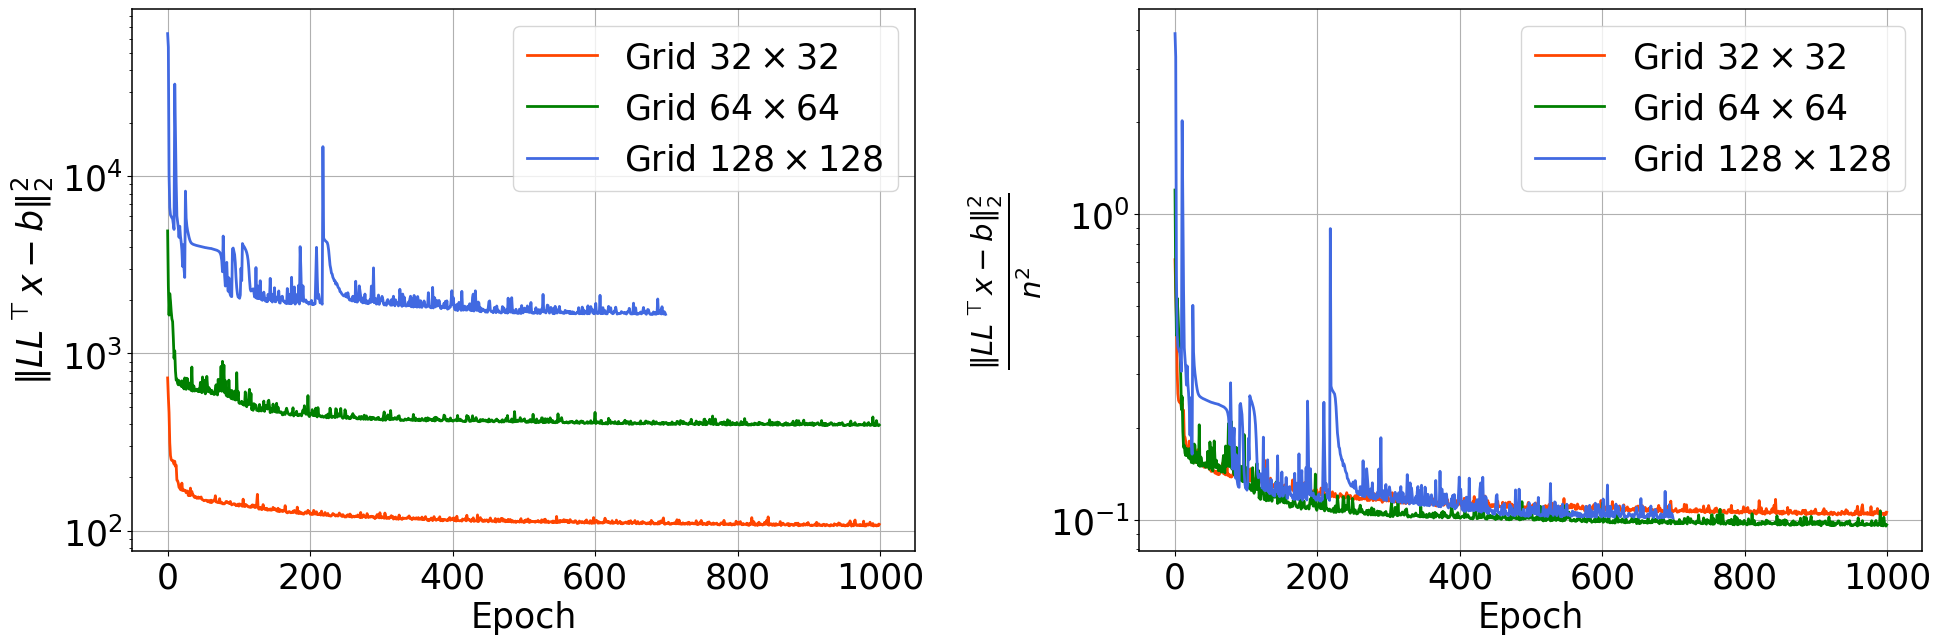

In [118]:
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.1#0.8
plt.set_cmap('jet')

_, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].plot(range(len(run_32['losses'][0])), run_32['losses'][1], label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='orangered')
axes[0].plot(range(len(run_64['losses'][0])), run_64['losses'][1], label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
axes[0].plot(range(len(run_128['losses'][0])), run_128['losses'][1], label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel(r'$\Vert LL^\top x - b \Vert_2^2$');

axes[1].plot(range(len(run_32['losses'][0])), run_32['losses'][1] / (32**2), label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='orangered')
axes[1].plot(range(len(run_64['losses'][0])), run_64['losses'][1] / (64**2), label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
axes[1].plot(range(len(run_128['losses'][0])), run_128['losses'][1] / (128**2), label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel(r'$\frac{\Vert LL^\top x - b \Vert_2^2}{n^2}$', fontsize=30);

plt.tight_layout()
# axes[1].plot(range(len(run_32['res_I'])), run_32['res_I'], label="CG")

In [ ]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
    pd.set_option('display.max_columns', 500)
    
    df = pd.read_csv(os.path.join(path, dir_name, 'meta_data.csv'), index_col=0)
    axes_num = 3 if with_cond else 2
    _, axes = plt.subplots(len(run_name), axes_num, figsize=figsize)
    if len(run_name) == 1:
        axes = np.expand_dims(axes, 0)
    
    for i, n in enumerate(run_name):
        file = os.path.join(path, dir_name, n+'.npz')
        run = jnp.load(file)
        axes[i, 0].plot(range(len(run['losses'][0])), run['losses'][1], label='Test')
        axes[i, 0].plot(range(len(run['losses'][0])), run['losses'][0], label='Train')
        axes[i, 0].legend()
        axes[i, 0].set_yscale('log')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].grid()
        axes[i, 0].set_title(n)
        
        axes[i, -1].plot(range(len(run['res_I'])), run['res_I'], label="CG")
        axes[i, -1].plot(range(len(run['res_LLT'])), run['res_LLT'], label="PCG")
        axes[i, -1].legend()
        axes[i, -1].set_yscale('log')
        axes[i, -1].set_xlabel('Iteration')
        axes[i, -1].set_ylabel('$\|res\|$')
        axes[i, -1].grid()

In [19]:
folder = 'full_dataset_f64'
df = read_meta_data(folder)

In [20]:
print(df.shape)
df#.head()

(36, 28)


,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg,precision
a71g6l,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.449305,58.581961,1.0,26.739440,-0.163216,94.0,117.0,135.0,151.0,21.0,28.0,35.0,41.0,26.784428,1294.722494,35.878988,f64
7npweh,poisson,32.0,0.5,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.623474,58.613883,1.0,26.739440,-0.158215,94.0,117.0,135.0,151.0,21.0,28.0,35.0,42.0,26.112120,1290.287685,33.801677,f64
8bh776,poisson,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.582818,58.608891,1.0,26.739440,-0.162196,94.0,117.0,135.0,151.0,21.0,28.0,35.0,42.0,28.025106,1290.362383,33.853193,f64
owz44h,div_k_grad,32.0,0.1,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,72.799470,74.308232,1.0,27.825211,-0.107998,129.0,168.0,199.0,228.0,22.0,29.0,36.0,42.0,26.786243,1292.468620,33.758369,f64
5wybgq,div_k_grad,32.0,0.5,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,104.635478,105.926954,1.0,28.537053,-0.072184,191.0,247.0,296.0,340.0,25.0,33.0,41.0,48.0,27.155146,1293.345890,33.013687,f64
507ps1,div_k_grad,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,129.428081,128.905875,1.0,30.632630,-0.058281,233.0,305.0,371.0,NaN,27.0,36.0,44.0,52.0,25.418882,1291.829176,33.518710,f64
h4rwjy,poisson,32.0,0.1,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,12.142962,12.044978,1.0,26.739440,-0.088483,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,55.402498,1823.213423,41.882236,f64
mpxgog,poisson,32.0,0.5,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,11.976269,11.889025,1.0,26.739440,-0.092618,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,53.764221,1819.568438,39.025788,f64
owbe72,poisson,32.0,0.7,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,12.140964,12.090656,1.0,26.739440,-0.088928,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,50.607648,1818.313632,38.921062,f64
dfzqvv,div_k_grad,32.0,0.1,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,18.769063,18.896185,1.0,27.825211,-0.072575,129.0,168.0,199.0,228.0,16.0,21.0,26.0,31.0,52.055555,1818.909704,38.983679,f64


In [14]:
df.columns

Index(['pde', 'grid', 'variance', 'N_samples_train', 'N_samples_test',
       'lhs_type', 'batch_size', 'epoch_num', 'lr_start', 'schedule_params',
       'cg_valid_repeats', 'train_loss_last', 'test_loss_last',
       'cond_prec_system', 'cond_initial_system', 'alpha', 'cg_1e_3',
       'cg_1e_6', 'cg_1e_9', 'cg_1e_12', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9',
       'pcg_1e_12', 'time_data', 'time_train', 'time_pcg', 'precision',
       'prec_inverse', 'loss_type'],
      dtype='object')

In [33]:
q = "pde == 'div_k_grad' and lhs_type == 'l_ict' and variance == 0.7"
check = df.query(q).index
print(check.shape)
df.query(q).loc[:, ['alpha', 'lhs_type', 'pde', 'grid', 'variance', 'batch_size', 'epoch_num', 'lr_start', 'train_loss_last', 'test_loss_last', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9', 'pcg_1e_12']]
# df.query(q).loc[:, ['lhs_type']]

(3,)


,alpha,lhs_type,pde,grid,variance,batch_size,epoch_num,lr_start,train_loss_last,test_loss_last,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12
wgchpc,-0.030033,l_ict,div_k_grad,32.0,0.7,8.0,1000.0,0.001,41.281669,42.277595,19.0,24.0,30.0,35.0
4qvbdd,-0.043936,l_ict,div_k_grad,64.0,0.7,8.0,1000.0,0.001,183.796049,165.828915,30.0,39.0,48.0,57.0
ws00g3,-0.035494,l_ict,div_k_grad,128.0,0.7,8.0,700.0,0.001,758.456307,687.068748,53.0,67.0,81.0,95.0


,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg,precision,prec_inverse,loss_type
5qr9w4,poisson,32,0.1,1000,200,l_ilu0,8,500,0.001,None,120,NaN,NaN,1,26.73944,NaN,94,117,NaN,NaN,NaN,NaN,NaN,NaN,24.216984,24900.746545,0.839355,f64,True,log_kaporin
9f3vix,poisson,32,0.1,1000,200,l_ilu0,8,500,0.001,None,120,NaN,NaN,1,26.73944,NaN,94,117,NaN,NaN,NaN,NaN,NaN,NaN,15.348599,24896.422747,12.286403,f64,False,log_kaporin
ltn5yh,poisson,32,0.1,1000,200,l_ilu0,8,500,0.001,None,120,0.001312,0.001263,1,26.73944,-0.022944,94,117,NaN,NaN,NaN,NaN,NaN,NaN,18.315614,25392.896381,0.516919,f64,True,spai_P_hutch


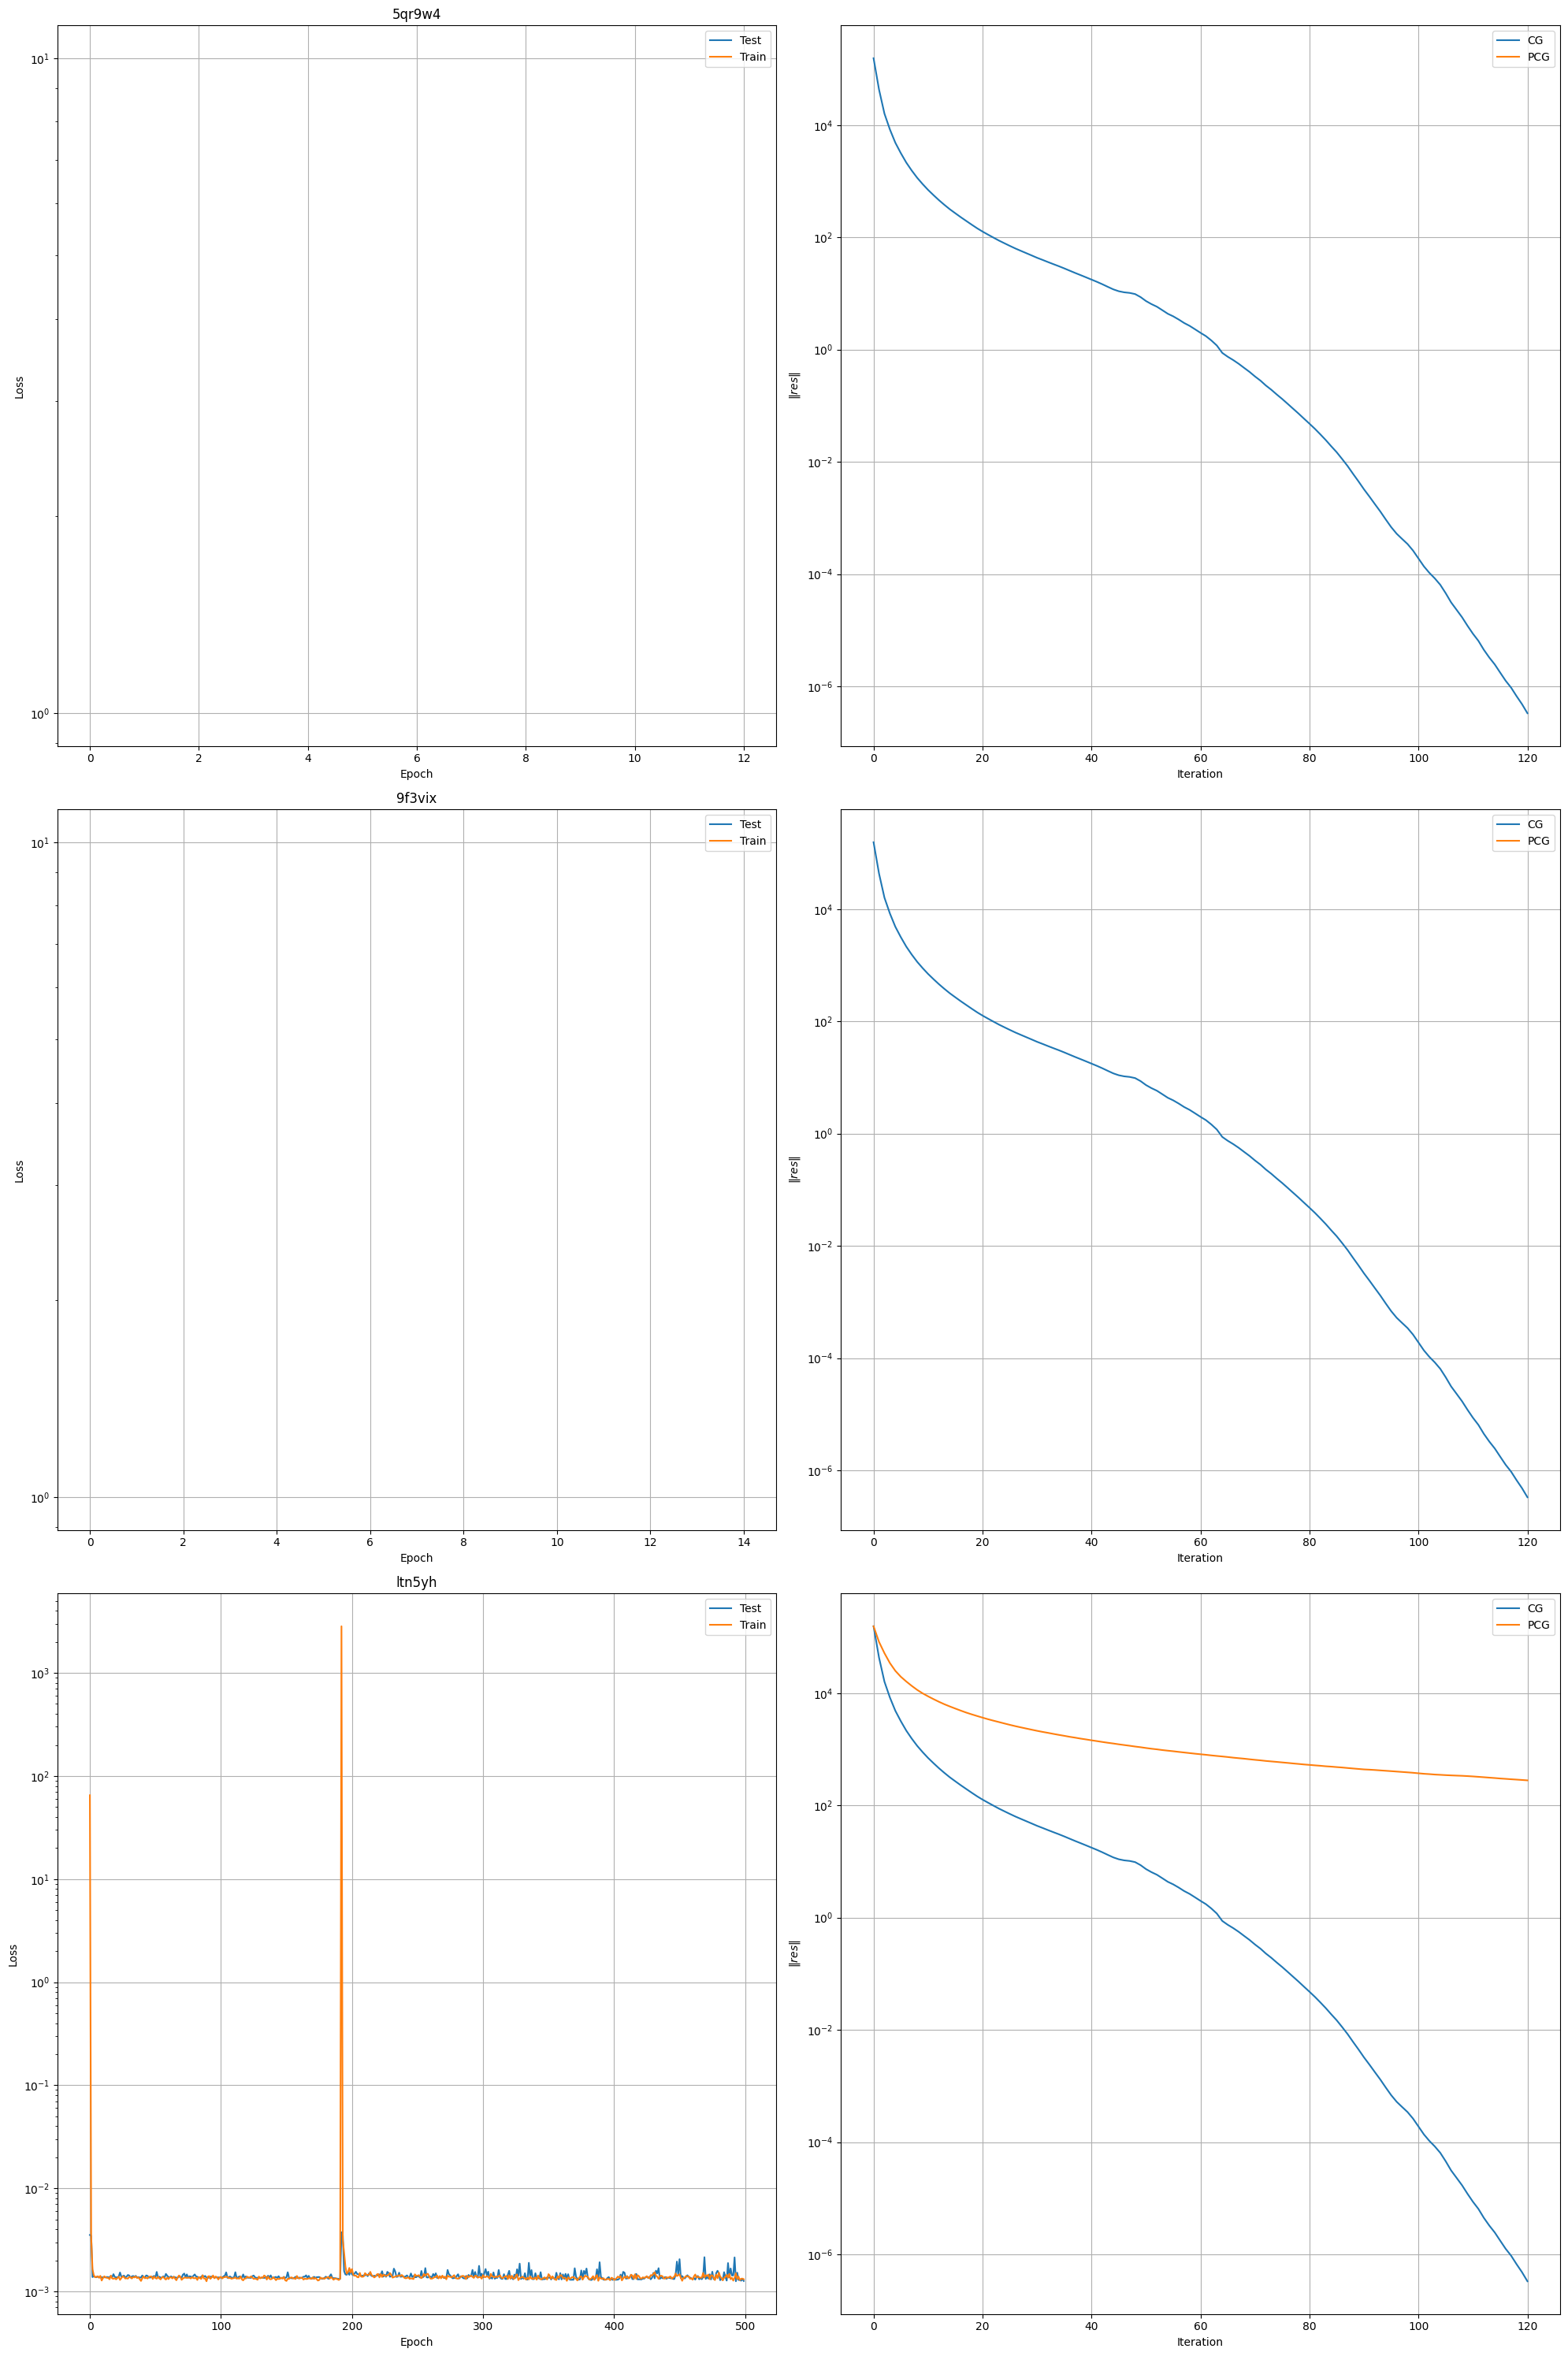

In [16]:
parse_run(folder, check, (20, 30), with_cond=False) # Second argument may be a list of idnex or 'check'

In [ ]:
# If not stated oppositge, each has following parameters:
# batch_size = 8, epoch_num = 1000, lr_start = 1e-3


names_01_32 = [
    'rsk886',    # batch_size = 16
    '5rafli'     # lr_start = 5e-4
]
names_01_64 = [
    'or87fe',
    '0y3wn9'
]
names_01_128 = [
    'oazezw',    # batch_size = 16, epoch_num = 700, lr_start = 1e-3
    'id5mjh'     # batch_size = 8,  epoch_num = 700, lr_start = 5e-4
]

names_05_32 = [
    'mn70w2',
    '7t25m5'
]
names_05_64 = [
    'xjfmrp',
    '12hp5x'
]
names_05_128 = [
    'yfbetl',    # batch_size = 16, epoch_num = 700, lr_start = 1e-3
    '3rpxrp'     # batch_size = 8,  epoch_num = 700, lr_start = 1e-3
]

names_07_32 = [
    'frf0bv',
    'usmx5e'
]
names_07_64 = [
    'mlavvm',
    'f3a9le'
]
names_07_128 = [
    '87jxom',    # batch_size = 8,  epoch_num = 700, lr_start = 1e-3
    'zfah2u'     # batch_size = 8,  epoch_num = 700, lr_start = 1e-3
]

poisson_32 = [
    '3s6zpm',     # batch_size = 8,   epoch_num = 400, lr_start = 1e-3
    'm055x0'      # batch_size = 32,  epoch_num = 400, lr_start = 1e-3
]
poisson_64 = [
    'rl8gh2',     # batch_size = 8,  epoch_num = 400, lr_start = 1e-3
    '8m5t3u'      # batch_size = 8,  epoch_num = 400, lr_start = 5e-4
]
poisson_128 = [
    '5j3ctz',     # batch_size = 16,  epoch_num = 400, lr_start = 1e-3
    'k5pndz'      # batch_size = 8,   epoch_num = 400, lr_start = 1e-3
]

In [3]:
plt.rcParams['font.size'] = 15

In [15]:
# folder = 'spai_kaporin_corrector_net'
# folder = 'div_k_grad01|_128_full_dataset'
folder = 'full_dataset_f64'
df = read_meta_data(folder)
print(df.shape)
df.index

(36, 28)


Index(['a71g6l', '7npweh', '8bh776', 'owz44h', '5wybgq', '507ps1', 'h4rwjy',
       'mpxgog', 'owbe72', 'dfzqvv', 'ua501w', 'wgchpc', 'fozzi7', '69ptf1',
       '1nwc5h', 'k4xx7b', '5o40s7', '34pn48', 'j36y56', 'difivq', 'y46v86',
       '3v3a15', 'ar2k55', '4qvbdd', 'usxb1s', 'ilb7bt', '86onp2', 'jnlve4',
       's0hknt', 'oinit4', '5gny59', '4otcox', 'jyyn47', 'ws00g3', 'dsj1dt',
       'zssuz4'],
      dtype='object')

In [24]:
# check = df.index

q = "variance == .7"#lhs_type == 'l_ict' and grid == 128 and variance == .1"
check = df.query(q).index

# print(check.shape)
# df.query(q).loc[:, ['alpha', 'lhs_type', 'pde', 'grid', 'variance', 'batch_size', 'epoch_num', 'lr_start', 'train_loss_last', 'test_loss_last', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9', 'pcg_1e_12']]
# df.query(q).loc[:, ['lhs_type']]

,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg,precision
8bh776,poisson,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.582818,58.608891,1.0,26.739440,-0.162196,94.0,117.0,135.0,151.0,21.0,28.0,35.0,42.0,28.025106,1290.362383,33.853193,f64
507ps1,div_k_grad,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,129.428081,128.905875,1.0,30.632630,-0.058281,233.0,305.0,371.0,NaN,27.0,36.0,44.0,52.0,25.418882,1291.829176,33.518710,f64
owbe72,poisson,32.0,0.7,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,12.140964,12.090656,1.0,26.739440,-0.088928,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,50.607648,1818.313632,38.921062,f64
wgchpc,div_k_grad,32.0,0.7,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,41.281669,42.277595,1.0,30.632630,-0.030033,233.0,305.0,372.0,NaN,19.0,24.0,30.0,35.0,68.735945,1818.914574,39.114175,f64
1nwc5h,poisson,64.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,316.138018,316.611537,1.0,27.245763,-0.185773,190.0,235.0,270.0,302.0,32.0,42.0,51.0,60.0,30.720143,4981.184823,338.957212,f64
34pn48,div_k_grad,64.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,471.094497,450.493136,1.0,36.510648,-0.066343,NaN,NaN,NaN,NaN,44.0,57.0,70.0,83.0,32.196078,4978.323336,338.159977,f64
y46v86,poisson,64.0,0.7,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,79.240973,79.584443,1.0,27.245763,-0.104765,190.0,235.0,270.0,302.0,24.0,31.0,38.0,45.0,110.634600,7205.526687,411.265463,f64
4qvbdd,div_k_grad,64.0,0.7,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,183.796049,165.828915,1.0,36.510648,-0.043936,NaN,NaN,NaN,NaN,30.0,39.0,48.0,57.0,115.256373,7212.891585,410.669953,f64
86onp2,poisson,128.0,0.7,1000.0,200.0,l_ilu0,8.0,700.0,0.001,None,200.0,1482.466150,1473.757074,1.0,27.226081,-0.183926,NaN,NaN,NaN,NaN,50.0,63.0,75.0,87.0,23.703706,14331.434564,2052.154999,f64
oinit4,div_k_grad,128.0,0.7,1000.0,200.0,l_ilu0,8.0,700.0,0.001,None,200.0,1730.304054,1900.786031,1.0,42.222136,-0.071378,NaN,NaN,NaN,NaN,77.0,100.0,121.0,144.0,22.318672,14331.949271,2051.934072,f64


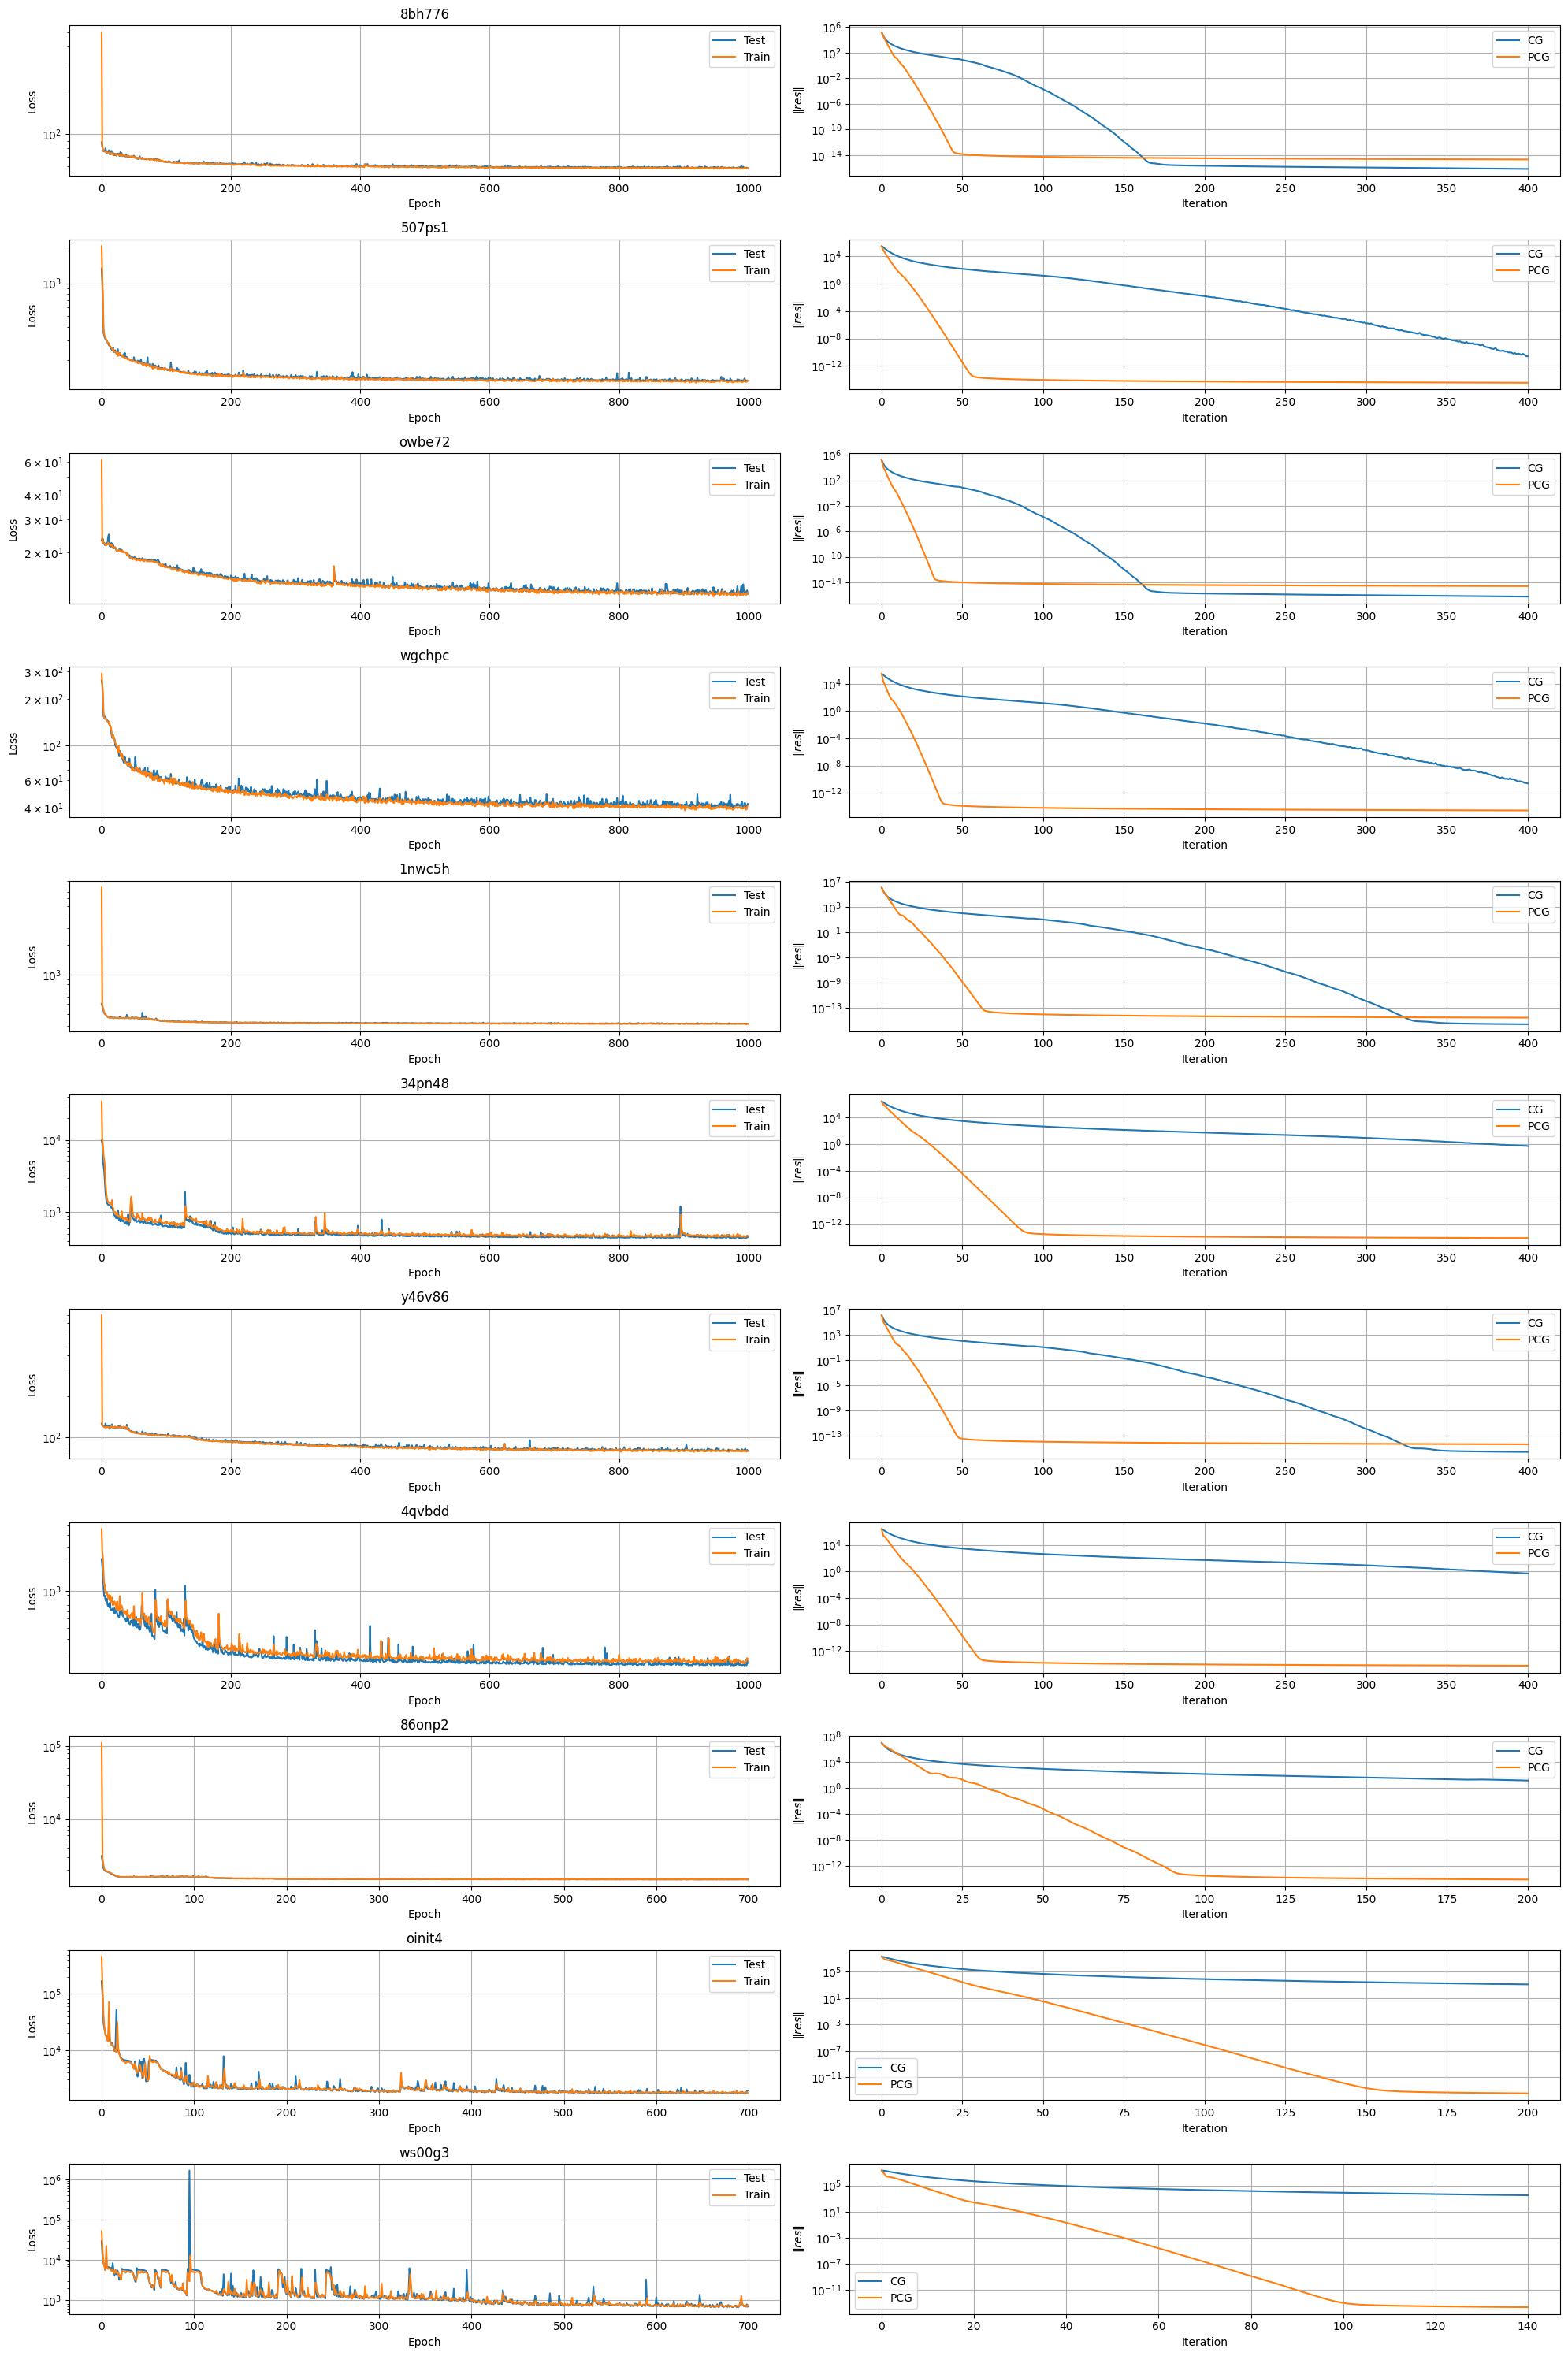

In [25]:
parse_run(folder, check, (20, 30), with_cond=False) # Second argument may be a list of idnices